**IMPORTING THE REQUIRED LIBRARIES**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**LOADING THE DATASET**

In [9]:
!pip install chardet
import chardet

with open('/content/NetflixOriginals (1).csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

encoding = result['encoding']

df = pd.read_csv('/content/NetflixOriginals (1).csv', encoding=encoding)


**HANDLING THE MISSING VALUES USING SIMPLE IMPUTER IN SKLEARN**

In [10]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [11]:

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = df.fillna(df.mean())  # Fill missing values with mean values

<ipython-input-11-5be8887a7716>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill missing values with mean values


**SPLITING THE DATA INTO TRAIN SET AND TEST SET**

In [14]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and contains your data
# Specify the features (X) and the target (y)
X = df.drop('IMDB Score', axis=1)  # Replace 'target_column_name' with the actual name of your target column
y = df['IMDB Score']  # Replace 'target_column_name' with the actual name of your target column

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter specifies the proportion of the data to be included in the test set (in this case, 20%).
# 'random_state' is set for reproducibility. You can change the value of 'random_state' to any integer.


**FEATURE SCALING USING MINMAXSCALER**

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Identify the non-numeric columns and exclude them from scaling
numeric_columns = X.select_dtypes(include=[float, int]).columns
X_numeric = X[numeric_columns]

# Fit the scaler on the training data and transform the numeric data
X_train_scaled = scaler.fit_transform(X_numeric)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test[numeric_columns])


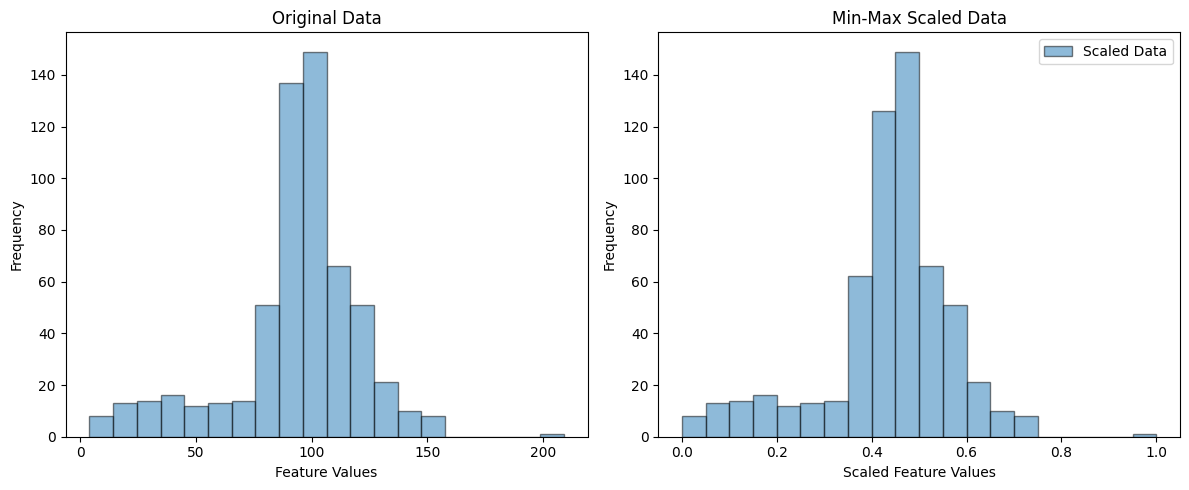

In [18]:
import matplotlib.pyplot as plt

# Plot histograms of the original and scaled data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
axes[0].hist(X_numeric.values, bins=20, edgecolor='k', alpha=0.5, label='Original Data')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature Values')
axes[0].set_ylabel('Frequency')

# Plot scaled data
axes[1].hist(X_train_scaled, bins=20, edgecolor='k', alpha=0.5, label='Scaled Data')
axes[1].set_title('Min-Max Scaled Data')
axes[1].set_xlabel('Scaled Feature Values')
axes[1].set_ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()
